In [1]:
import yfinance as yf

# Download historical data for Apple (AAPL) from Yahoo Finance
data = yf.download("AAPL", start="2010-01-01", end="2023-03-26")

# Print the first 5 rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505280  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516529  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412872  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401017  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443574  447610800


In [4]:
# Now let's get the most recent months, which is the last 30 days of data. in a 5-minute interval
data = yf.download("AAPL", period="1mo", interval="5m")
print(data.head())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-02-27 09:30:00-05:00  147.710007  148.369995  147.699997  148.130005   
2023-02-27 09:35:00-05:00  148.149994  148.354202  147.810104  147.925995   
2023-02-27 09:40:00-05:00  147.946503  148.380005  147.860001  148.110001   
2023-02-27 09:45:00-05:00  148.110001  148.440002  147.889999  148.270004   
2023-02-27 09:50:00-05:00  148.279999  148.419998  148.070007  148.199997   

                            Adj Close   Volume  
Datetime                                        
2023-02-27 09:30:00-05:00  148.130005  2259226  
2023-02-27 09:35:00-05:00  147.925995   996867  
2023-02-27 09:40:00-05:00  148.110001   769263  
2023-02-27 09:45:00-05:00  148.270004   785763  
2023-02-27 09:50:00-05:00  148.199997   705815  


[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Datetime'>

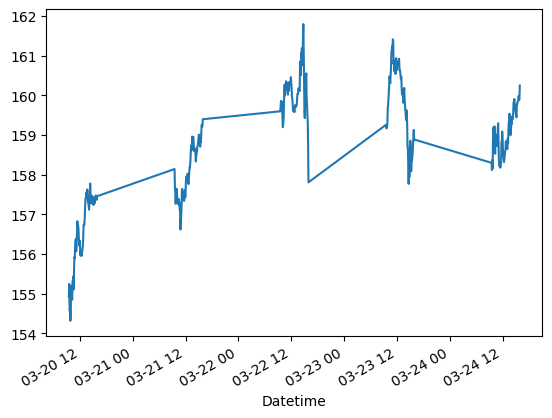

In [6]:
# let's plot the data for the last week of trading from the last week in 5-minute intervals
import matplotlib.pyplot as plt
data = yf.download("AAPL", period="1wk", interval="5m")
data['Close'].plot()